In [ ]:
import numpy as np
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
from torchvision import datasets,transforms,models


In [ ]:
!pip3 install torchvision

In [ ]:
!ls

 model_resnet50.pth   sample_data  'train-scene classification.zip'
 resnet50.csv	      train.csv    'vgg19 - vgg19.csv'


In [ ]:
%rm -rf test
%rm -rf root
%rm -rf train

In [ ]:
!wget --header="Host: doc-14-3g-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.121 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://drive.google.com/uc?id=10qN7OUzTutCg8ruwFosml0xzi0elsI5N&export=download" --header="Cookie: AUTH_phlou141ijqp0pd4purho3qub2qmep4f=17793030815577614369|1554004800000|r1gc336443kc653mmgm0c3ji7ekeqcs3" --header="Connection: keep-alive" "https://doc-14-3g-docs.googleusercontent.com/docs/securesc/i84cjh6drqtrjag098cklnqcercgij0u/fskhqfiskm0gfk18lnbe8ua6b8d4ia57/1554004800000/15249538500823033517/17793030815577614369/10qN7OUzTutCg8ruwFosml0xzi0elsI5N?e=download" -O "train-scene classification.zip" -c

--2019-03-31 04:22:23--  https://doc-14-3g-docs.googleusercontent.com/docs/securesc/i84cjh6drqtrjag098cklnqcercgij0u/fskhqfiskm0gfk18lnbe8ua6b8d4ia57/1554004800000/15249538500823033517/17793030815577614369/10qN7OUzTutCg8ruwFosml0xzi0elsI5N?e=download
Resolving doc-14-3g-docs.googleusercontent.com (doc-14-3g-docs.googleusercontent.com)... 74.125.202.132, 2607:f8b0:4001:c06::84
Connecting to doc-14-3g-docs.googleusercontent.com (doc-14-3g-docs.googleusercontent.com)|74.125.202.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-zip-compressed]
Saving to: ‘train-scene classification.zip’

train-scene classif     [             <=>    ] 359.11M   105MB/s    in 3.4s    

2019-03-31 04:22:27 (105 MB/s) - ‘train-scene classification.zip’ saved [376553787]



In [ ]:
%mkdir test
%cd test
%mkdir 0
%mkdir 1
%mkdir 2
%mkdir 3
%mkdir 4
%mkdir 5
%cd ..

/content/test
/content


In [ ]:
%mkdir root
%cd root
%mkdir 0
%mkdir 1
%mkdir 2
%mkdir 3
%mkdir 4
%mkdir 5
%cd ..

/content/root
/content


In [ ]:
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = "train-scene classification.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    zip.extractall() 
    print('Done!') 

Done!


In [ ]:
import pandas as pd
images_label = pd.read_csv("train.csv")

In [ ]:
images_label.head()

,image_name,label
0,0.jpg,0
1,1.jpg,4
2,2.jpg,5
3,4.jpg,0
4,7.jpg,4


In [ ]:
images_label.shape

(17034, 2)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images_label["image_name"], images_label["label"], test_size=0.25, random_state=42)
#X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [ ]:
dict_train ={
              "class": list(y_train), 
              "label": list(X_train)              
             }
train_df = pd.DataFrame(dict_train)
print(len(train_df))
train_df.head()


12775


,class,label
0,3,9896.jpg
1,2,7096.jpg
2,0,15962.jpg
3,3,1996.jpg
4,1,13351.jpg


In [ ]:
dict_test = {
            "label":list(X_test),
             "class":list(y_test)
    }

test_df = pd.DataFrame(dict_test)
print(len(test_df))
test_df.head()

4259


,class,label
0,2,16451.jpg
1,0,9117.jpg
2,0,14885.jpg
3,0,3067.jpg
4,1,5323.jpg


In [ ]:
class_0 = train_df[train_df["class"] == 0]
class_1 = train_df[train_df["class"] == 1]
class_2 = train_df[train_df["class"] == 2]
class_3 = train_df[train_df["class"] == 3]
class_4 = train_df[train_df["class"] == 4]
class_5 = train_df[train_df["class"] == 5]


In [ ]:
class_0_test = test_df[test_df["class"] == 0]
class_1_test = test_df[test_df["class"] == 1]
class_2_test = test_df[test_df["class"] == 2]
class_3_test = test_df[test_df["class"] == 3]
class_4_test = test_df[test_df["class"] == 4]
class_5_test = test_df[test_df["class"] == 5]

In [ ]:
%ls

 root/          test/    train.csv                        'vgg19 - vgg19.csv'
 sample_data/   train/  'train-scene classification.zip'


In [ ]:
#train
import shutil 
import os 
for file in os.listdir("train"):
    if file.title().lower() in list(class_0_test["label"]):
      src_dir = "train/" + file.title().lower()
      dst_dir = "test/0/"
      shutil.move(src_dir,dst_dir)
    elif file.title().lower() in list(class_1_test["label"]):
      src_dir = "train/" + file.title().lower()
      dst_dir = "test/1/"
      shutil.move(src_dir,dst_dir)
    elif file.title().lower() in list(class_2_test["label"]):
      src_dir = "train/" + file.title().lower()
      dst_dir = "test/2/"
      shutil.move(src_dir,dst_dir)
    elif file.title().lower() in list(class_3_test["label"]):
      src_dir = "train/" + file.title().lower()
      dst_dir = "test/3/"
      shutil.move(src_dir,dst_dir)
    elif file.title().lower() in list(class_4_test["label"]):
      src_dir = "train/" + file.title().lower()
      dst_dir = "test/4/"
      shutil.move(src_dir,dst_dir)
    elif file.title().lower() in list(class_5_test["label"]):
      src_dir = "train/" + file.title().lower()
      dst_dir = "test/5/"
      shutil.move(src_dir,dst_dir)

In [ ]:
#train
import shutil 
import os 
for file in os.listdir("train"):
    if file.title().lower() in list(class_0["label"]):
      src_dir = "train/" + file.title().lower()
      dst_dir = "root/0/"
      shutil.move(src_dir,dst_dir)
    elif file.title().lower() in list(class_1["label"]):
      src_dir = "train/" + file.title().lower()
      dst_dir = "root/1/"
      shutil.move(src_dir,dst_dir)
    elif file.title().lower() in list(class_2["label"]):
      src_dir = "train/" + file.title().lower()
      dst_dir = "root/2/"
      shutil.move(src_dir,dst_dir)
    elif file.title().lower() in list(class_3["label"]):
      src_dir = "train/" + file.title().lower()
      dst_dir = "root/3/"
      shutil.move(src_dir,dst_dir)
    elif file.title().lower() in list(class_4["label"]):
      src_dir = "train/" + file.title().lower()
      dst_dir = "root/4/"
      shutil.move(src_dir,dst_dir)
    elif file.title().lower() in list(class_5["label"]):
      src_dir = "train/" + file.title().lower()
      dst_dir = "root/5/"
      shutil.move(src_dir,dst_dir)

In [ ]:
class_dict = { 'buildings' : 0,     'forest' : 1,     'glacier' : 2,     'mountain' : 3,     'sea' : 4,     'street' : 5 }

In [ ]:
%ls

 root/          test/    train.csv                        'vgg19 - vgg19.csv'
 sample_data/   train/  'train-scene classification.zip'


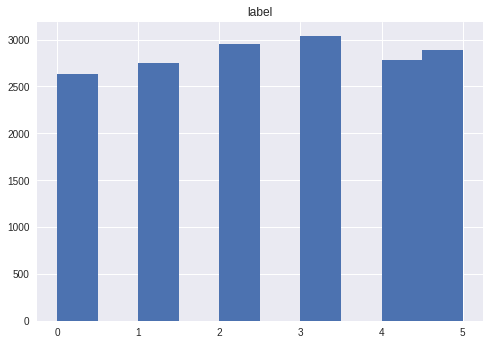

Data seems balanced


In [ ]:
#plt.plot(images_label.hist())
images_label.hist()
plt.show()
print("Data seems balanced")

In [ ]:
"""transforms.Compose([transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),transforms.RandomRotation(degrees=15),
        transforms.ColorJitter(), transforms.RandomHorizontalFlip(), transforms.CenterCrop(size=224),transforms.ToTensor()
    ])"""

'transforms.Compose([transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),transforms.RandomRotation(degrees=15),\n        transforms.ColorJitter(), transforms.RandomHorizontalFlip(), transforms.CenterCrop(size=224),transforms.ToTensor()\n    ])'

In [ ]:
"""train_transforms = transforms.Compose([transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),transforms.RandomRotation(degrees=15),
        transforms.ColorJitter(), transforms.RandomHorizontalFlip(), transforms.CenterCrop(size=224),transforms.ToTensor()
    ])
test_transforms = transforms.Compose([transforms.Resize(size=(224,224)),transforms.ToTensor()])
train_dataset = datasets.ImageFolder("root/",transform=train_transforms)
test_dataset = datasets.ImageFolder("test/",transform=test_transforms)
train_data = torch.utils.data.DataLoader(train_dataset,batch_size=64,shuffle=True)
test_data = torch.utils.data.DataLoader(test_dataset,batch_size=64,shuffle=True)"""

'train_transforms = transforms.Compose([transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),transforms.RandomRotation(degrees=15),\n        transforms.ColorJitter(), transforms.RandomHorizontalFlip(), transforms.CenterCrop(size=224),transforms.ToTensor()\n    ])\ntest_transforms = transforms.Compose([transforms.Resize(size=(224,224)),transforms.ToTensor()])\ntrain_dataset = datasets.ImageFolder("root/",transform=train_transforms)\ntest_dataset = datasets.ImageFolder("test/",transform=test_transforms)\ntrain_data = torch.utils.data.DataLoader(train_dataset,batch_size=64,shuffle=True)\ntest_data = torch.utils.data.DataLoader(test_dataset,batch_size=64,shuffle=True)'

In [ ]:
train_transforms = transforms.Compose([transforms.Resize(size=(224,224)), transforms.ToTensor()])
test_transforms = transforms.Compose([transforms.Resize(size=(224,224)),transforms.ToTensor()])
train_dataset = datasets.ImageFolder("root/",transform=train_transforms)
test_dataset = datasets.ImageFolder("test/",transform=test_transforms)
train_data = torch.utils.data.DataLoader(train_dataset,batch_size=128,shuffle=True)
test_data = torch.utils.data.DataLoader(test_dataset,batch_size=128,shuffle=True)

In [ ]:
"""
sub_transform = transforms.Compose([transforms.Resize(size=(224,224)),transforms.ToTensor()])
sub_dataset = datasets.ImageFolder("train/",transform=sub_transform)
sub_data = torch.utils.data.DataLoader(sub_dataset,batch_size=128,shuffle=True)"""

'\nsub_transform = transforms.Compose([transforms.Resize(size=(224,224)),transforms.ToTensor()])\nsub_dataset = datasets.ImageFolder("train/",transform=sub_transform)\nsub_data = torch.utils.data.DataLoader(sub_dataset,batch_size=128,shuffle=True)'

In [ ]:
"""
import torch.nn as nn
import torch.optim as optim"""
"""model = models.resnet50(pretrained=True)
for param in model.parameters():
    param.requires_grad = False
classifier = nn.Sequential(nn.Dropout(0.5),
                           nn.Linear(2048,6),
                           nn.ReLU(),
                           nn.LogSoftmax(dim=1))
model.fc = classifier
criterion = nn.NLLLoss()
optimizer = optim.Adadelta(model.fc.parameters(), lr=0.03)
model.to(device)"""


'model = models.resnet50(pretrained=True)\nfor param in model.parameters():\n    param.requires_grad = False\nclassifier = nn.Sequential(nn.Dropout(0.5),\n                           nn.Linear(2048,6),\n                           nn.ReLU(),\n                           nn.LogSoftmax(dim=1))\nmodel.fc = classifier\ncriterion = nn.NLLLoss()\noptimizer = optim.Adadelta(model.fc.parameters(), lr=0.03)\nmodel.to(device)'

In [ ]:
"""import torch
import torch.nn as nn
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import torch.optim as optim
model = models.resnet34(pretrained=True)
for param in model.parameters():
    param.requires_grad = False
classifier = nn.Sequential(nn.Dropout(0.5),
                           nn.Linear(2048,1024),
                           nn.ReLU(),
                           nn.Dropout(0.3),
                           nn.Linear(1024,512),
                           nn.ReLU(),
                           nn.Dropout(0.3),
                           nn.Linear(512,256),
                           nn.ReLU(),
                           nn.Dropout(0.3),
                           nn.Linear(256,128),
                           nn.ReLU(),
                           nn.Dropout(0.1),
                           nn.Linear(128,64),
                           nn.ReLU(),
                           nn.Dropout(0.1),
                           nn.Linear(64,6),
                           nn.ReLU(),
                           nn.LogSoftmax(dim=1))
model.fc = classifier
criterion = nn.NLLLoss()
optimizer = optim.Adadelta(model.fc.parameters(), lr=0.03)
model.to(device)
"""

'import torch\nimport torch.nn as nn\ndevice = torch.device("cuda" if torch.cuda.is_available() else "cpu")\nimport torch.optim as optim\nmodel = models.resnet34(pretrained=True)\nfor param in model.parameters():\n    param.requires_grad = False\nclassifier = nn.Sequential(nn.Dropout(0.5),\n                           nn.Linear(2048,1024),\n                           nn.ReLU(),\n                           nn.Dropout(0.3),\n                           nn.Linear(1024,512),\n                           nn.ReLU(),\n                           nn.Dropout(0.3),\n                           nn.Linear(512,256),\n                           nn.ReLU(),\n                           nn.Dropout(0.3),\n                           nn.Linear(256,128),\n                           nn.ReLU(),\n                           nn.Dropout(0.1),\n                           nn.Linear(128,64),\n                           nn.ReLU(),\n                           nn.Dropout(0.1),\n                           nn.Linear(64,6),\n 

In [ ]:
"""device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import torch.nn as nn
import torch.optim as optim
model = models.resnet34(pretrained=True)
for param in model.parameters():
    param.requires_grad = False
classifier = nn.Sequential(nn.Linear(512,256),
                           nn.ReLU(),
                           nn.Dropout(0.2),
                           nn.Linear(256,128),
                           nn.ReLU(),
                           nn.Linear(128,64),
                           nn.ReLU(),
                           nn.Dropout(0.1),
                           nn.Linear(64,6),
                           nn.ReLU(),
                           nn.LogSoftmax(dim=1))
model.fc = classifier
criterion = nn.NLLLoss()
optimizer = optim.Adadelta(model.fc.parameters(), lr=0.03)
model.to(device)
"""

'device = torch.device("cuda" if torch.cuda.is_available() else "cpu")\nimport torch.nn as nn\nimport torch.optim as optim\nmodel = models.resnet34(pretrained=True)\nfor param in model.parameters():\n    param.requires_grad = False\nclassifier = nn.Sequential(nn.Linear(512,256),\n                           nn.ReLU(),\n                           nn.Dropout(0.2),\n                           nn.Linear(256,128),\n                           nn.ReLU(),\n                           nn.Linear(128,64),\n                           nn.ReLU(),\n                           nn.Dropout(0.1),\n                           nn.Linear(64,6),\n                           nn.ReLU(),\n                           nn.LogSoftmax(dim=1))\nmodel.fc = classifier\ncriterion = nn.NLLLoss()\noptimizer = optim.Adadelta(model.fc.parameters(), lr=0.03)\nmodel.to(device)\n'

In [ ]:
""""device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import torch.nn as nn
import torch.optim as optim
model = models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False
classifier = nn.Sequential(nn.Linear(512,256),
                           nn.ReLU(),
                           nn.Dropout(0.3),
                           nn.Linear(256,32),
                           nn.ReLU(),
                           nn.Dropout(0.3),
                           nn.Linear(32,6),
                           nn.ReLU(),
                           nn.LogSoftmax(dim=1))

classifier
model.fc = classifier
torch.nn.init.xavier_normal_(model.fc[0].weight)
torch.nn.init.xavier_normal_(model.fc[3].weight)
torch.nn.init.xavier_normal_(model.fc[6].weight)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adadelta(model.fc.parameters(), lr=0.09)
model.to(device)""""

In [ ]:
print(torch.__version__)

1.0.1.post2


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import torch.nn as nn
import torch.optim as optim
model = models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False



#model.classifier[6] = nn.Sequential(nn.Linear(4096,6),nn.LeakyReLU(),nn.LogSoftmax(dim=1))
model.fc = nn.Sequential(nn.Linear(512,6),nn.LeakyReLU(),nn.LogSoftmax(dim=1))
torch.nn.init.orthogonal_(model.fc[0].weight)
#torch.nn.init.xavier_normal_(model.fc[3].weight)
#torch.nn.init.xavier_normal_(model.fc[6].weight)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adadelta(model.fc.parameters(), lr=0.03)
model.to(device)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

torch.nn.modules.linear.Linear

In [ ]:
params = sum(p.numel() for p in model.parameters() if p.requires_grad)
params

3078

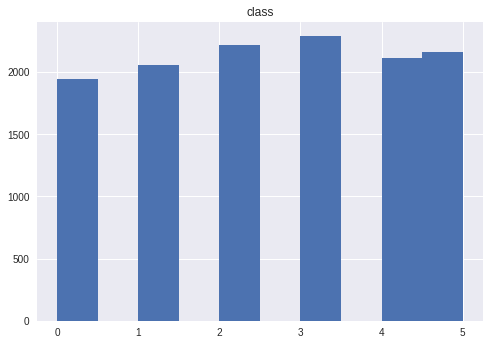

Data seems balanced


In [ ]:
train_df.hist()
plt.show()
print("Data seems balanced")

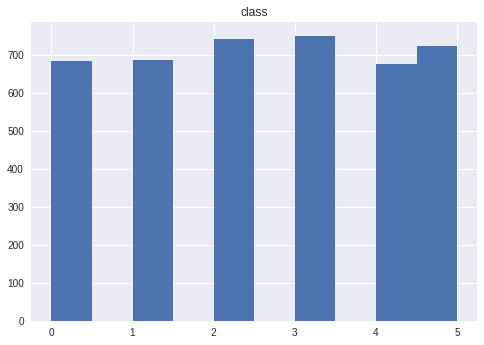

In [ ]:
test_df.hist()
plt.show()

In [ ]:
len(train_data)

94

In [ ]:

import pdb
import time
train_loss_his = []
test_loss_his = []
acc_his = []
epochs = 50
steps = 0
running_loss = 0
for epoch in (range(epochs)):
    start = time.time()
    print("Epoch :" , epoch+1)
    for index, (images, labels) in enumerate(train_data):
        images, labels = images.to(device), labels.to(device)
        steps += 1
        optimizer.zero_grad()
        logps = model(images)
        loss = criterion(logps,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
    model.eval()
    test_loss = 0
    accuracy = 0

    with torch.no_grad():
      for index, (images, labels) in enumerate(test_data):
          images, labels = images.to(device), labels.to(device)
          logps = model(images)
          loss = criterion(logps, labels)
          test_loss += loss.item()
          ps =torch.exp(logps)
          top_ps, top_class = ps.topk(1,dim=1)
          equality =top_class == labels.view(*top_class.shape)
          accuracy += torch.mean(equality.type(torch.FloatTensor))
          
    train_loss_his.append(running_loss/len(train_data))
    test_loss_his.append(test_loss/len(test_data))
    acc_his.append(accuracy*100/len(test_data))
    
    print(f"  Epoch {epoch+1}/{epochs}    "
           f"Train Loss : {running_loss/len(train_data):.3f}   "
         f"Test_loss : {test_loss/len(test_data):.3f}    "
         f"Test_accuracy%: {accuracy*100/len(test_data):.3f}")
    print(str(time.time()-start) + " seconds")
    running_loss = 0
    model.train()

Epoch : 1
  Epoch 1/50    Train Loss : 1.772   Test_loss : 1.577    Test_accuracy%: 38.678
103.82504606246948 seconds
Epoch : 2
  Epoch 2/50    Train Loss : 1.317   Test_loss : 1.076    Test_accuracy%: 64.479
99.64718914031982 seconds
Epoch : 3
  Epoch 3/50    Train Loss : 0.948   Test_loss : 0.824    Test_accuracy%: 74.458
101.99319839477539 seconds
Epoch : 4
  Epoch 4/50    Train Loss : 0.753   Test_loss : 0.676    Test_accuracy%: 79.735
110.13593363761902 seconds
Epoch : 5
  Epoch 5/50    Train Loss : 0.635   Test_loss : 0.582    Test_accuracy%: 82.446
105.49480938911438 seconds
Epoch : 6
  Epoch 6/50    Train Loss : 0.556   Test_loss : 0.518    Test_accuracy%: 84.437
107.9904134273529 seconds
Epoch : 7
  Epoch 7/50    Train Loss : 0.498   Test_loss : 0.470    Test_accuracy%: 85.318
105.12679767608643 seconds
Epoch : 8
  Epoch 8/50    Train Loss : 0.459   Test_loss : 0.431    Test_accuracy%: 86.283
114.0365617275238 seconds
Epoch : 9
  Epoch 9/50    Train Loss : 0.427   Test_loss : 

In [ ]:

import pdb
import time
train_loss_his_1 = []
test_loss_his_1 = []
acc_his_1 = []
epochs = 20
steps = 0
running_loss = 0
for epoch in (range(epochs)):
    start = time.time()
    print("Epoch :" , epoch+1)
    for index, (images, labels) in enumerate(train_data):
        images, labels = images.to(device), labels.to(device)
        steps += 1
        optimizer.zero_grad()
        logps = model(images)
        loss = criterion(logps,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
    model.eval()
    test_loss = 0
    accuracy = 0

    with torch.no_grad():
      for index, (images, labels) in enumerate(test_data):
          images, labels = images.to(device), labels.to(device)
          logps = model(images)
          loss = criterion(logps, labels)
          test_loss += loss.item()
          ps =torch.exp(logps)
          top_ps, top_class = ps.topk(1,dim=1)
          equality =top_class == labels.view(*top_class.shape)
          accuracy += torch.mean(equality.type(torch.FloatTensor))
          
    train_loss_his_1.append(running_loss/len(train_data))
    test_loss_his_1.append(test_loss/len(test_data))
    acc_his_1.append(accuracy*100/len(test_data))
    
    print(f"  Epoch {epoch+1}/{epochs}    "
           f"Train Loss : {running_loss/len(train_data):.3f}   "
         f"Test_loss : {test_loss/len(test_data):.3f}    "
         f"Test_accuracy%: {accuracy*100/len(test_data):.3f}")
    print(str(time.time()-start) + " seconds")
    running_loss = 0
    model.train()

Epoch : 1
  Epoch 1/20    Train Loss : 0.212   Test_loss : 0.228    Test_accuracy%: 91.867
184.9081711769104 seconds
Epoch : 2
  Epoch 2/20    Train Loss : 0.212   Test_loss : 0.223    Test_accuracy%: 92.218
184.86595797538757 seconds
Epoch : 3
  Epoch 3/20    Train Loss : 0.211   Test_loss : 0.224    Test_accuracy%: 92.065
183.12676239013672 seconds
Epoch : 4
  Epoch 4/20    Train Loss : 0.211   Test_loss : 0.223    Test_accuracy%: 92.264
201.73814511299133 seconds
Epoch : 5
  Epoch 5/20    Train Loss : 0.209   Test_loss : 0.221    Test_accuracy%: 92.233
184.59141159057617 seconds
Epoch : 6
  Epoch 6/20    Train Loss : 0.208   Test_loss : 0.226    Test_accuracy%: 92.050
183.5429368019104 seconds
Epoch : 7
  Epoch 7/20    Train Loss : 0.208   Test_loss : 0.223    Test_accuracy%: 92.134
180.92630672454834 seconds
Epoch : 8
  Epoch 8/20    Train Loss : 0.206   Test_loss : 0.222    Test_accuracy%: 92.050
203.69309186935425 seconds
Epoch : 9
  Epoch 9/20    Train Loss : 0.205   Test_loss :

In [ ]:
!ls

 model_resnet50_1.pth   root	      train.csv
 model_resnet50.pth     sample_data  'train-scene classification.zip'
 resnet50_1.csv         test	     'vgg19 - vgg19.csv'
 resnet50.csv	        train


In [ ]:
from google.colab import files
files.download('model_resnet50_1.pth') 

KeyboardInterrupt: ignored

In [ ]:
torch.save(model,"model_resnet50_2.pth")

In [ ]:
model = torch.load(PATH)
model.eval()

In [ ]:
train_loss_list = train_loss_his+train_loss_his_1+train_loss_his_2
test_loss_list = test_loss_his+test_loss_his_1+test_loss_his_2
accuracy_list = acc_his+acc_his_1+acc_his_2

In [ ]:
data_tuple = list(zip(train_loss_list,test_loss_list,accuracy_list))

TypeError: ignored

In [ ]:
loss_history = pd.DataFrame()
loss_history["train_loss"] = train_loss_list
loss_history["test_loss"] = test_loss_list
loss_history["accuracy"] = accuracy_list

In [ ]:
loss_history.to_csv("history.csv")

In [ ]:
from google.colab import files
files.download('model.pth') 

In [ ]:
torch.save(model,"model.pth")

In [ ]:

sample = ["0.jpg" ,"11430.jpg",  "12814.jpg" , "14105.jpg",  "15485.jpg" , "16850.jpg"  ,"18198.jpg"]

In [ ]:
!kill -9 -1

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
from collections import OrderedDict
def image_loader(image_name):
    loader = transforms.Compose([transforms.Resize(size=(224,224)),transforms.ToTensor()])
    image = Image.open(image_name)
    image = loader(image).float()
    image = Variable(image, requires_grad=True)
    image = image.unsqueeze(0)  #this is for VGG, may not be needed for ResNet
    return image.cuda()  #assumes that you're using GPU

In [ ]:
%cd ..

/content


In [ ]:
cols = ['image_num','image_name', 'label']
submission = pd.DataFrame(columns=cols, index=range(7302))
a=0
exc = []
for file in os.listdir("train"):
    #print(1)
    if file.title().lower().endswith('.jpg') :
      try:
         
        src_dir = "train/" + file.title().lower()
        image = image_loader(src_dir)
        outputs = model(image)
        _, preds = torch.max(outputs, 1)
        submission.loc[a].image_num = int(os.path.splitext(file.title().lower())[0])
        submission.loc[a].image_name = (file.title().lower())
        submission.loc[a].label = (preds.item())
        a += 1
      except:
        exc.append(file.title().lower())
        
     


In [ ]:
exc

['7606.jpg']

In [ ]:
data=submission.sort_values('image_num')
data.head()


,image_num,image_name,label
6353,3,3.jpg,3
4451,5,5.jpg,3
7184,6,6.jpg,2
2623,11,11.jpg,2
3505,14,14.jpg,3


In [ ]:
%ls

 model_resnet50_1.pth   resnet50.csv   train/
 model_resnet50_2.pth   root/          train.csv
 model_resnet50.pth     sample_data/  'train-scene classification.zip'
 resnet50_1.csv         test/         'vgg19 - vgg19.csv'


In [ ]:
data.to_csv('resnet50_3_.csv',index=False)

In [ ]:
from google.colab import files
files.download('resnet50_3_.csv') 

In [ ]:
def plot_solution(image_path, model):
    # Set up plot
    plt.figure(figsize = (6,10))
    ax = plt.subplot(2,1,1)
    # Set up title
    flower_num = image_path.split('/')[1]
    title_ = "letsC"
    # Plot flower
    img = process_image(image_path)
    imshow(img, ax, title = title_);
    # Make prediction
    probs, labs, flowers = predict(image_path, model) 
    # Plot bar chart
    plt.subplot(2,1,2)
    sns.barplot(x=probs, y=flowers, color=sns.color_palette()[0]);
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
from collections import OrderedDict

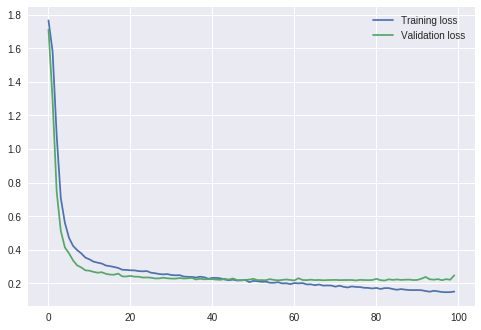

In [ ]:
plt.plot(train_loss_his, label='Training loss')
plt.plot(test_loss_his, label='Validation loss')
plt.legend(frameon=False)
plt.show()

In [ ]:
sub_transform = transforms.Compose([transforms.Resize(size=(224,224)),transforms.ToTensor()])
sub_dataset = datasets.ImageFolder("train/",transform=sub_transform)
sub_data = torch.utils.data.DataLoader(sub_dataset,batch_size=128,shuffle=True)

torch.Size([1, 3, 224, 224])


In [ ]:
import torchvision
from pylab import *
imshow(torchvision.utils.make_grid(test1))

In [ ]:
%cd ..

/content


In [ ]:

loader = transforms.Compose([transforms.Resize(size=(224,224)),transforms.ToTensor()])
image_name ="train/5.jpg"
def image_loader(image_name):
    """load image, returns cuda tensor"""
    image = Image.open(image_name)
    image = loader(image).float()
    image = Variable(image, requires_grad=True)
    image = image.unsqueeze(0)  #this is for VGG, may not be needed for ResNet
    return image.cuda()  #assumes that you're using GPU

image = image_loader(image_name)
#print (image.size())
outputs = model(image)
_, preds = torch.max(outputs, 1)
outputs

tensor([[-8.5831e-06, -1.4287e+01, -1.4287e+01, -1.4287e+01, -1.3454e+01,
         -1.2116e+01]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

In [ ]:
#cv
import shutil 
import os 

def image_loader(image_name):
    """load image, returns cuda tensor"""
    image = Image.open(image_name)
    image = loader(image).float()
    image = Variable(image, requires_grad=True)
    image = image.unsqueeze(0)  #this is for VGG, may not be needed for ResNet
    return image.cuda()  #assumes that you're using GPU
  
cols = ['image_name', 'label']
submission = pd.DataFrame(columns=cols, index=range(7302))
a=0
exc = []
for file in os.listdir("train"):
    if file.title().lower().endswith('.jpg') :
      try:
        image_name = file.title().lower()
        src_dir = "train/" + image_name
        image = image_loader(src_dir)
        outputs = model(image)
        _, preds = torch.max(outputs, 1)
        submission.loc[a].image_name = (file.title().lower())
        submission.loc[a].label = (preds.item())
        a += 1
      except:
        exc.append(image_name)
        
     

In [ ]:
submission.to_csv("1st_submission.csv",index=True)

In [ ]:
from google.colab import files
files.download('1st_submission.csv') 

In [ ]:
submission.head()

NameError: ignored

In [ ]:
#image_name = file.title().lower()
cols = ['image_name', 'label']
df = pd.DataFrame(columns=cols, index=range(1))
src_dir = "train/" + '5.jpg'
image = image_loader(src_dir)
outputs = model(image)
_, preds = torch.max(outputs, 1)
df.loc[a].image_name = str(file.title().lower())
df.loc[a].label = int(preds.item())

'5'

In [ ]:
%ls

 cv/     sample_data/   train/     'train-scene classification.zip'
 root/   test/          train.csv


In [ ]:
Imshow(test1.cpu().data[0])

NameError: ignored

TypeError: ignored

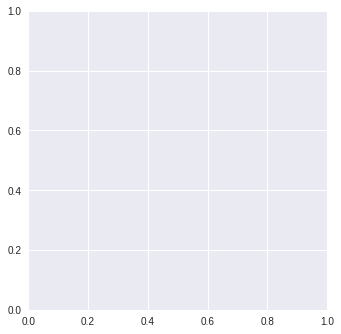

In [ ]:
from matplotlib import pyplot as plt
image1 = Image.open(image_name)
image1 = loader(image1).float()
image2= np.array(image1)
plt.imshow(image2, interpolation='nearest')
plt.show()
%matplotlib inline

In [ ]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(test_data_c):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [ ]:
%ls

 cv/     sample_data/   train/     'train-scene classification.zip'
 root/   test/          train.csv


In [ ]:
class_names = ['buildings',
 'forest',
 'glacier',
 'mountain',
 'sea',
 'street']

In [ ]:
class_dict


{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

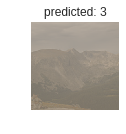

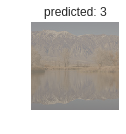

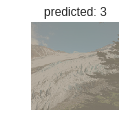

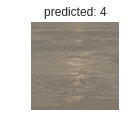

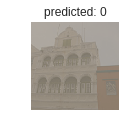

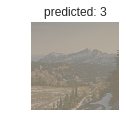

In [ ]:
visualize_model(model)